<a target="_blank" href="https://colab.research.google.com/github/bmalcover/cursSocib/blob/main/2_AA/2_3_Detection_segmentacton.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Detection and Segmentation

## Object Detection

Object detection is the task of identifying and localizing objects within an image, typically by predicting bounding boxes and class labels for each detected object. The standard pipeline involves proposing candidate bounding boxes, classifying the content within each box, and post-processing to remove redundant detections.


<img src="../assets/bloc2/detection.png " width="550" />


## Methods

Methods for object detection generally fall into either **neural network-based** or **non-neural** approaches.

### Non-Neural Approaches

In non-neural approaches, it is necessary to first define features using one of the methods below. After extracting features, typically using a sliding window, and then those are classified using ML classifiers. Basically the detection problem is transformed into a image classification problem.

Most known techniques are:
- Viola–Jones object detection framework (based on [Haar features](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)).  
- Scale-Invariant Feature Transform (**SIFT** [link](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)).
- Histogram of Oriented Gradients (**HOG** [link](https://learnopencv.com/histogram-of-oriented-gradients/)).

### Neural Network Approaches

Neural techniques allow for **end-to-end object detection** without explicitly defining features. These methods are typically based on **Convolutional Neural Networks (CNNs)**.

- OverFeat
- RetinaNet
- Single Shot MultiBox Detector (SSD)
- **Region Proposals**: R-CNN , Fast R-CNN, Faster R-CNN...
- **You Only Look Once (YOLO)**. 


### Evaluation Metrics

1. Intersection over Union (IoU): Measures the overlap between predicted and ground truth bounding boxes. A detection is considered correct if IoU is greater than a threshold (commonly 0.5).

  $$ 
  IoU = \frac{\text{Area of Overlap}}{\text{Area of Union}} 
  $$


2. **Precision and Recall**: These metrics are used to evaluate classification performance. They are typically visualized using a **precision-recall curve**.

- **Precision:**

  $$ 
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} 
  $$

- **Recall:**

  $$ 
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} 
  $$

3. **Average Precision (AP):** To resume the information given by the precision-recall curve, AP is calculated for a given class. It summarizes the precision-recall trade-off across all confidence thresholds. Often computed at different IoU thresholds (e.g., 0.5, 0.75).

4. **Mean Average Precision (mAP)**: is the mean of AP values across all object classes. Multiple benchmarks use its own format, some examples:
  - **mAP@0.5**: Mean AP at IoU threshold 0.5 (used in [Pascal VOC](http://host.robots.ox.ac.uk/pascal/VOC/)).
  - **mAP@0.5:0.95**: Mean AP at IoU thresholds from 0.5 to 0.95 in steps of 0.05 (used in [COCO](https://cocodataset.org/#home)).


5. **F1 Score**: The harmonic mean of precision and recall. Less commonly used than AP/mAP in object detection benchmarks.

  $$ 
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} 
  $$










We will now perform an object detection process on the image using Faster R-CNN, a detection network that outputs a label, a confidence score, and a bounding box location for each detected object.

Pytorch provides the TorchVision module with differnt pretrained models [link](https://docs.pytorch.org/vision/stable/models.html#).

In [20]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the image
image_path = "../assets/bloc2/turtle.jpg"
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image)

# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

predictions = model([image_tensor])[0]
predictions;

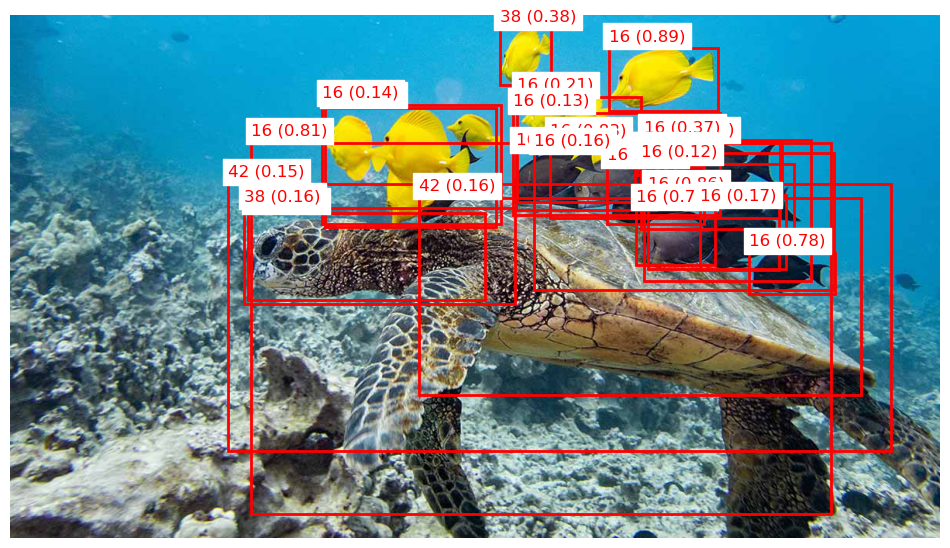

In [19]:
# Draw results
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

threshold = 0.1  # Change the threshold to see how it changes
for box, label, score in zip(predictions['boxes'], predictions['labels'], predictions['scores']):
    if score >= threshold:
        
        label = label.detach().numpy()
        box = box.detach().numpy()
        score = score.detach().numpy()
        
        x1, y1, x2, y2 = box

        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 10, f"{label.item()} ({score:.2f})",
                color='red', fontsize=12, backgroundcolor='white')

plt.axis('off')
plt.show()

## Segmentation

Image segmentation is a technique that divides an image into different regions to facilitate its analysis. Given an input image, the output of a segmentation process is a new image where each pixel is assigned a class.

There are different types of image segmentation:

### Semantic Segmentation

In semantic segmentation, groups of pixels in an image are identified and classified by assigning a class label based on their characteristics such as color, texture, and shape. This provides a pixel-wise map of an image (segmentation map) to enable more detailed and accurate image analysis. Typically, one or more object classes present in the dataset are selected, and all pixels that do not belong to relevant classes are labeled as "background."

For example, if you want to segment trees in an image, all pixels related to a "tree" would be labeled with the same object name, without distinguishing between individual trees. Another example would be labeling a group of people in an image as a single object called "people."

### Instance Segmentation

Instance segmentation is more sophisticated, as it involves identifying and delineating each individual object within an image. Therefore, it goes beyond identifying object classes and also outlines the exact boundaries of each individual object instance. Like in semantic segmentation, all pixels that do not belong to relevant classes are labeled as "background."

This technique must distinguish between separate objects of the same class. For example, if there are many cats in an image, instance segmentation would identify each specific cat. The segmentation map is created for every individual pixel, and separate labels are assigned to specific object instances by creating distinct labels to represent each "cat" in the group.

![segmentation](../assets/bloc2/segmentacio_semantica.png " Instance Segmentation")

### **Panoptic Segmentation**

Panoptic segmentation goes a step further by combining the features and processes of both semantic and instance segmentation techniques. Thus, the panoptic segmentation algorithm produces a complete analysis of the image by simultaneously classifying each pixel and identifying different object instances of the same class.

For example, given an image with several cars and pedestrians at a traffic signal, panoptic segmentation would label all "pedestrians" and "cars" (semantic segmentation), and also classify other elements of the scene such as traffic signs, lights, buildings, and background. In this way, panoptic segmentation detects and interprets all elements within a given image.

![segmentation](../assets/bloc2/panoptic.png " PanopticSegmentation")

### State of the Art


_Recent_ advances rely heavily on deep learning, especially convolutional neural networks (CNNs). Notable models include:

- **U-Net**: Widely used in biomedical imaging, it introduced a symmetric encoder-decoder architecture with skip connections.
- **Mask R-CNN**: Extends Faster R-CNN by adding a branch for predicting segmentation masks for each detected object instance.
- **DeepLab series**: Utilizes atrous (dilated) convolutions and conditional random fields to refine segmentations, achieving strong performance in semantic tasks.
- **YOLO**: can be seen as a Swiss Army knife among vision models, capable of handling multiple tasks such as detection, segmentation, and classification.
- **Transformer-based models** like **Segment Anything Model (SAM)** from Meta: Represent a shift toward attention mechanisms, showing state-of-the-art performance on complex datasets.



Pytorch Documentation [link](https://pytorch.org/vision/main/models.html#semantic-segmentation).